In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# https://www.kaggle.com/datasets/simaanjali/diabetes-classification-dataset?rvi=1

In [3]:
df = pd.read_csv("Diabetes Classification.csv")
df

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...
5127,5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [4]:
df["Diagnosis"].value_counts()

Diagnosis
0    3139
1    1993
Name: count, dtype: int64

In [5]:
df.drop(columns = ["Unnamed: 0"], axis = 1, inplace = True)

In [6]:
df

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...
5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


<Axes: xlabel='Age', ylabel='Density'>

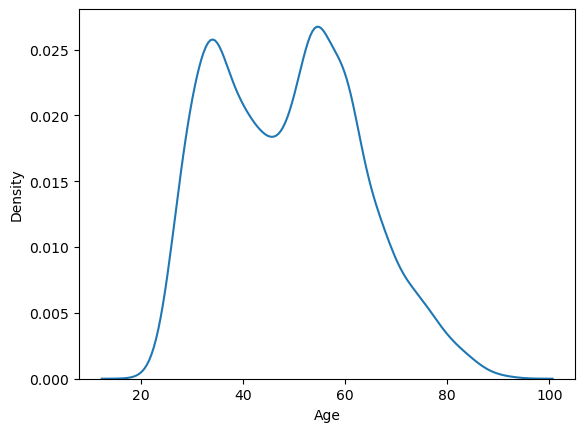

In [7]:
sns.kdeplot(x = df["Age"])

In [8]:
counts = df["Gender"].value_counts()

<Axes: xlabel='Gender'>

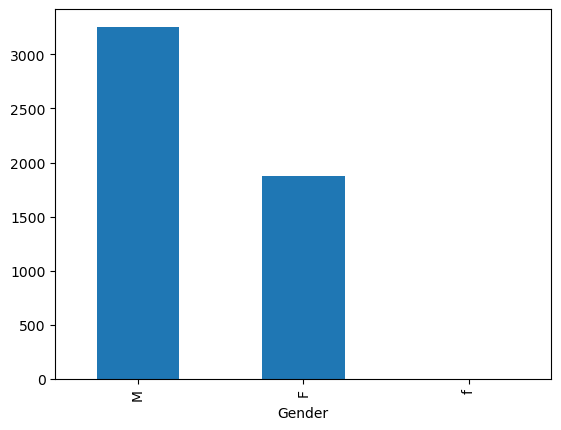

In [9]:
counts.plot(kind = "bar")

<Axes: xlabel='Age', ylabel='Diagnosis'>

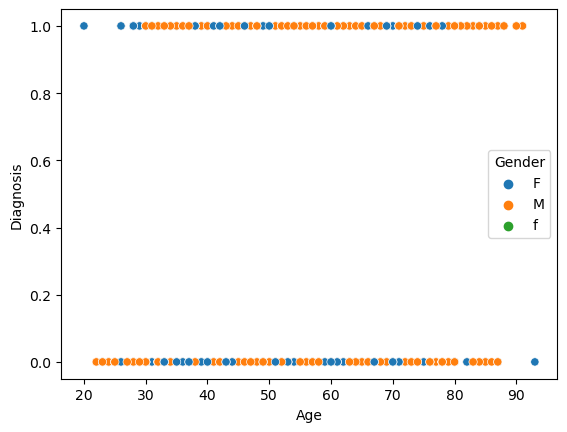

In [10]:
sns.scatterplot(x = "Age", y = "Diagnosis", hue = "Gender", data = df)

<Axes: xlabel='LDL', ylabel='BMI'>

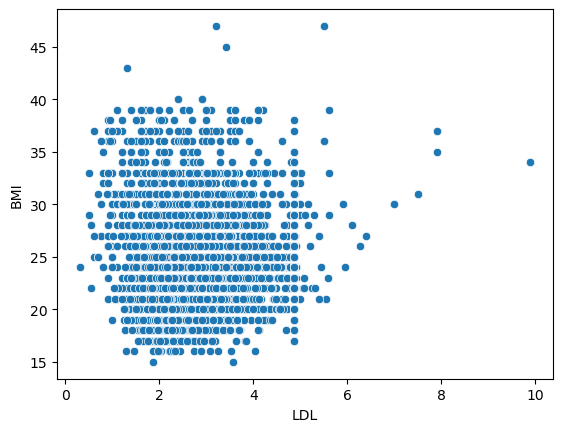

In [11]:
sns.scatterplot(x = "LDL", y = "BMI", data = df)

<Axes: xlabel='LDL', ylabel='HDL'>

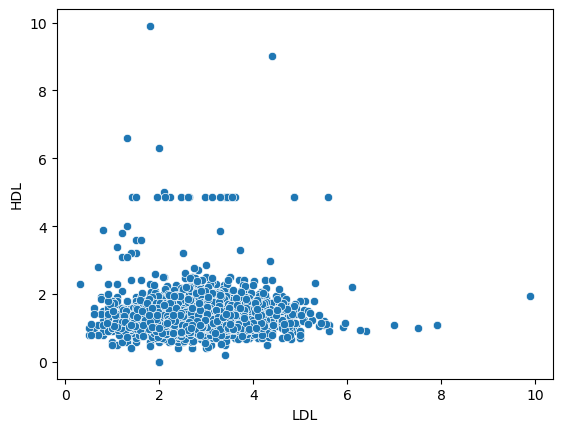

In [12]:
sns.scatterplot(x = "LDL", y = "HDL", data = df)

<Axes: xlabel='LDL', ylabel='BMI'>

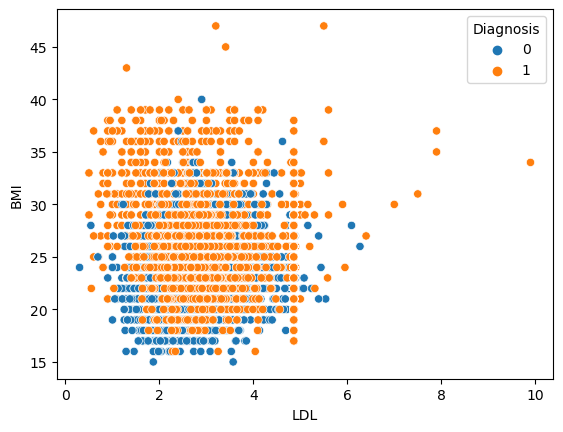

In [13]:
sns.scatterplot(x = "LDL", y = "BMI", hue = "Diagnosis",  data = df)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
params = {'penalty' : ["l1", "l2"], "C" : [.0001, .001, 0.01, .1, 1]}
_cv = GridSearchCV(LogisticRegression(), cv = 7, param_grid = params)

In [17]:
df = pd.get_dummies(columns = ["Gender"], data = df)
gender_cols = ["Gender_F", "Gender_M", "Gender_f"]
for gender in gender_cols:
    df[gender] = [1 if a == True else 0 for a in df[gender]]
y = df["Diagnosis"]
x = df.drop(columns = ["Diagnosis"], axis = 1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [18]:
_cv.fit(x_train, y_train)

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'penalty': ['l1', 'l2']})

In [19]:
df

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis,Gender_F,Gender_M,Gender_f
0,50,24,4.20,0.90,2.40,1.40,46.0,4.70,0,1,0,0
1,26,23,3.70,1.40,1.10,2.10,62.0,4.50,0,0,1,0
2,33,21,4.90,1.00,0.80,2.00,46.0,7.10,0,0,1,0
3,45,21,2.90,1.00,1.00,1.50,24.0,2.30,0,1,0,0
4,50,24,3.60,1.30,0.90,2.10,50.0,2.00,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5127,54,23,5.00,1.50,1.24,2.98,77.0,3.50,1,0,1,0
5128,50,22,4.37,2.09,1.37,2.29,47.3,4.40,1,1,0,0
5129,67,24,3.89,1.38,1.14,2.17,70.6,4.73,1,0,1,0
5130,60,29,5.91,1.29,1.73,2.85,50.2,7.33,1,1,0,0


In [20]:
_cv.score(x_train,y_train)

0.8129110840438489

In [21]:
_cv.score(x_test, y_test)

0.7994157740993184

In [22]:
_cv.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [23]:
_cv.predict([[35, 25, 3.19, 2.88, 1.91,2.11,  49, 5.33, 1, 0, 0]])

E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
df.shape

(5132, 12)

In [27]:
params = {"max_depth" : np.arange(2, 11), "min_samples_split" : [2, 3, 4, 5, 6], "n_estimators" : [100,120, 130, 150, 200]}
rf_cv = GridSearchCV(RandomForestClassifier(), cv = 6, param_grid = params)
rf_cv.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 120, 130, 150, 200]})

In [28]:
rf_cv.score(x_train, y_train)

0.8864799025578562

In [29]:
rf_cv.score(x_test, y_test)

0.8120740019474196

In [30]:
rf_cv.best_params_

{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 150}